## Продвинутые идеи

In [ ]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / numpy.linalg.norm(vec1)).reshape(3), (vec2 / numpy.linalg.norm(vec2)).reshape(3)
    v = numpy.cross(a, b)
    if any(v): #if not all zeros then 
        c = numpy.dot(a, b)
        s = numpy.linalg.norm(v)
        kmat = numpy.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        return numpy.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))

    else:
        return numpy.eye(3) #cross of all zeros only occurs on identical directions

In [ ]:
def rotate(X, Y, Z, Mat):
    new_x = []
    new_y = []
    new_z = []
    
    for elem in zip(X,Y,Z):
        res = Mat.dot(elem)
        new_x.append(res[0])
        new_y.append(res[1])
        new_z.append(res[2])
        
    return new_x, new_y, new_z

In [ ]:
def integrate(lst):
    res = []
    s = 0
    for elem in lst:
        s += elem
        res.append(s)
    return res

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
path = r'/content/drive/My Drive/mini-course-public' 
data = {}

Data = []
Target = []

i=0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=';')
            if df.shape[1] != 5:
                print(dir_entry_path.split("\\")[-1], df.shape)
            else:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=',')
            if df.shape[1] == 5:
                print(dir_entry_path.split("\\")[-1])
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние1.csv (1963, 1)
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние2.csv (2051, 1)
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние3.csv (1374, 1)
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние4.csv (1399, 1)
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_2.csv (3101, 1)
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_3.csv (1496, 1)
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_4.csv (3041, 1)
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_5.csv (1240, 1)
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_лестница_3.csv (2075, 1)
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_лестница_2.csv (2185, 1)
/content/drive/My Drive/mi

Нарисуем 9 графиков:

первый ряд:

1) исходные данные

2) норма ускорения

3) FFT от нормы ускорения


второй ряд:

4) FFT от ax (старая ось, но можно и от новой)

5) FFT от ay (старая ось, но можно и от новой)

6) FFT от az (старая ось, но можно и от новой)


третий ряд:

7) перемещение вдоль оси x

8) перемещение вдоль оси y

9) перемещение вдоль оси z

In [ ]:
classes = {'тояни' : 0, 'месте' : 0, 'одьб' : 1, 'аг' : 1, 'ег' : 2, 'елоси' : 3, 'естн' : 4, 'одъ' : 4, 
           'втомо' : 5, 'ашин' : 5, 'метро' : 6, 'лектро' : 7, 'амок' : 8}

answers = {'стояние' : 0, 'ходьба' : 1, 'бег' : 2, 'велосипед' : 3, 'лестница' : 4, 
           'автомобиль' : 5, 'метро' : 6, 'электросамокат' : 7, 'самокат' : 8}

# стояние, ходьба, велосипед, лестница, бег, подъем, подъём, автомобиль, электросамокат, машина, метро

In [ ]:
def get_action(name):
    for act in classes:
        if name.lower().find(act) != -1:
            return classes[act]
    return -1

In [ ]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    Min = 0
    print(name)
    
    if a == -1:
        st = 1250
    else:
        st = a
            
    if b == -1:
        end = -1250
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    #print(name)
    #fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    #print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem / 62500 for elem in new_x]
    new_y = [elem / 62500 for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [(elem-1)/62500 for elem in new_z]
    
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(new_x)
    if int_x:
      a4.append(mean(int_x))
    else:
      a4.append(0)
    int_x = integrate(int_x)
    if int_x:
      a7.append(max(int_x) - min(int_x))
    else:
      a7.append(0)
    #ax7.plot(int_x)
    
    int_y = integrate(new_y)
    if int_y:
      a5.append(mean(int_y))
    else:
      a5.append(0)
    int_y = integrate(int_y)
    if int_y:
      a8.append(max(int_y) - min(int_y))
    else:
      a8.append(0)
    #ax8.plot(int_y)
    
    int_z = integrate(new_z)
    if int_z:
      a6.append(mean(int_z))
    else:
      a6.append(0)
    int_x = integrate(int_x)
    if int_z:
      a9.append(max(int_z) - min(int_z))
    else:
      a9.append(0)
    #ax9.plot(int_z)

########################################################################        
#преобразование Фурье
########################################################################        
    Fs = 250
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    y = Acc.values
    if y.any(): 
      n = len(y) # length of the signal
      k = np.arange(n)
      T = n/Fs
      frq = k/T # two sides frequency range
      frq = frq[:len(frq)//2] # one side frequency range

      Y = np.fft.fft(y)/n # dft and normalization
      Y = Y[:n//2]
      
      yabs = abs(Y)
      #ax3.plot(frq,yabs) # plotting the spectrum
      #ax3.set_xlim([0,30])
      #ax3.set_ylim([Min,0.1])
      if yabs.any():
        yabs = np.delete(yabs, 0)
      if yabs.any():
        a1.append(frq[argmax(yabs)])
        a2.append(max(yabs))
        #print("Max: ", max(yabs))
        #print("Ind: ", frq[argmax(yabs)])
      else:
        a1.append(0)
        a2.append(0)
    else:
      a1.append(0)
      a2.append(0)
########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    #ax2.plot(Acc)
    #plt.show()
    
    print(name + ' Амплитуда:', Acc.max()-Acc.min())
    if Acc.any():
        a3.append(Acc.max() - Acc.min())
    else:
        a3.append(0)
    return df

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []
a9 = []
x = 0
for df, target in zip(Data,Target):
    process_data(df, name=target)
    x += 1
    #if x == 50:
      #break

/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.07.30_Явон_ходьба
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.07.30_Явон_ходьба Амплитуда: 1.4410749646076408
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.09.08_Явон_ходьба
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.09.08_Явон_ходьба Амплитуда: 1.8358567455126371
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.10.23_Явон_ходьба
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.10.23_Явон_ходьба Амплитуда: 1.5020684911458146
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.11.28_Явон_ходьба
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.11.28_Явон_ходьба Амплитуда: 1.620282703099679
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.17.06_Явон_лестница
/content/drive/My Drive/mini-course-public/Илья - 2021-07-0416.17.06_Явон_лестница Амплитуда: 1.0755481086273484
/content/drive/My Drive/mini-course-p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.



/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние1.csv Амплитуда: nan
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние2.csv
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние2.csv Амплитуда: nan
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние3.csv
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние3.csv Амплитуда: nan
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние4.csv
/content/drive/My Drive/mini-course-public/Юлия Виноградова - Виноградова_стояние4.csv Амплитуда: nan
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_2.csv
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_2.csv Амплитуда: 0.38627581292043023
/content/drive/My Drive/mini-course-public/Алексей Гомбожапов - Гомбожапов_бег_3.csv
/content/drive/My Drive/mini-course-publi

In [ ]:
answer = [get_action(target) for target in Target]


In [ ]:
len(answer)

1207

In [ ]:
Res = pd.DataFrame({'track_num' : np.arange(len(answer))})
Res.head()

,track_num
0,0
1,1
2,2
3,3
4,4


In [ ]:
a7 = [sqrt(a4[i]**2+a5[i]**2+a6[i]**2) for i in range(0, len(a4))]

In [ ]:
Res['ind'] = a1
Res['max'] = a2
Res['ampl'] = a3
Res['x'] = a4
Res['y'] = a5
Res['z'] = a6
Res['x2'] = a7
Res['y2'] = a8
Res['z2'] = a9
Res['answer'] = answer
Res.head(10)

,track_num,ind,max,ampl,x,y,z,x2,y2,z2,answer
0,0,2.017100,0.055244,1.441075,0.000175,0.000028,0.000376,0.000416,0.586912,0.000835,1
1,1,2.044923,0.103005,1.835857,-0.000311,-0.000075,0.000438,0.000542,0.575150,0.000922,1
2,2,1.969555,0.063809,1.502068,-0.000379,0.000023,0.000342,0.000511,0.174854,0.000855,1
3,3,2.010017,0.068644,1.620283,-0.000327,-0.000206,0.000403,0.000558,1.573467,0.000860,1
4,4,1.470794,0.046772,1.075548,0.000014,-0.000082,-0.000718,0.000723,0.739117,0.001361,4
5,5,1.403312,0.056327,0.976202,-0.000239,-0.000030,-0.000847,0.000880,0.390667,0.001812,4
6,6,1.453488,0.053852,1.111195,-0.000273,-0.000242,-0.000489,0.000610,1.711770,0.001256,4
7,7,1.341447,0.039528,1.050631,-0.000691,-0.000159,-0.000764,0.001043,1.288114,0.001598,4
8,8,1.163958,0.001701,0.645971,0.000997,0.000841,0.002224,0.002578,27.702010,0.005642,0
9,9,4.207985,0.047951,2.642379,-0.000175,-0.000047,0.001702,0.001711,0.869786,0.003755,1


In [ ]:
df1 = Res[Res.isna().any(axis=1)]
df1

,track_num,ind,max,ampl,x,y,z,x2,y2,z2,answer
152,152,0.0,NaN,6.993402,NaN,NaN,NaN,NaN,NaN,NaN,4
218,218,0.0,NaN,4.845182,NaN,NaN,NaN,NaN,NaN,NaN,4
231,231,0.0,NaN,6.900680,NaN,NaN,NaN,NaN,NaN,NaN,0
346,346,0.0,NaN,2.762487,NaN,NaN,NaN,NaN,NaN,NaN,1
399,399,0.0,NaN,5.371652,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
Res = Res.dropna()

In [ ]:
y = Res['answer']

In [ ]:
X = Res[['ind', 'max', 'ampl', 'x', 'y', 'z', 'x2', 'y2', 'z2']]

In [ ]:
Res.shape

(1202, 11)

In [ ]:
import os
import pandas as pd
path = r'/content/drive/My Drive/test' 
data = {}

Data = []
Target = []

i=0
for dir_entry in sorted(os.listdir(path)):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            print(dir_entry_path.split("\\")[-1])
            try:
                df = pd.read_csv(my_file, delimiter=';')
                if df.shape[1] == 5:
                    Data.append(df)
                    Target.append(dir_entry_path.split("\\")[-1])
            except UnicodeDecodeError:
                print(dir_entry_path.split("\\")[-1])
                pass

for dir_entry in sorted(os.listdir(path)):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            print(dir_entry_path.split("\\")[-1])
            try:
                df = pd.read_csv(my_file, delimiter=',')
                if df.shape[1] == 5:
                    Data.append(df)
                    Target.append(dir_entry_path.split("\\")[-1])
            except UnicodeDecodeError:
                print(dir_entry_path.split("\\")[-1])
                pass

/content/drive/My Drive/test/track_0.csv
/content/drive/My Drive/test/track_1.csv
/content/drive/My Drive/test/track_10.csv
/content/drive/My Drive/test/track_100.csv
/content/drive/My Drive/test/track_101.csv
/content/drive/My Drive/test/track_102.csv
/content/drive/My Drive/test/track_103.csv
/content/drive/My Drive/test/track_104.csv
/content/drive/My Drive/test/track_105.csv
/content/drive/My Drive/test/track_106.csv
/content/drive/My Drive/test/track_107.csv
/content/drive/My Drive/test/track_108.csv
/content/drive/My Drive/test/track_109.csv
/content/drive/My Drive/test/track_11.csv
/content/drive/My Drive/test/track_110.csv
/content/drive/My Drive/test/track_111.csv
/content/drive/My Drive/test/track_112.csv
/content/drive/My Drive/test/track_113.csv
/content/drive/My Drive/test/track_114.csv
/content/drive/My Drive/test/track_115.csv
/content/drive/My Drive/test/track_116.csv
/content/drive/My Drive/test/track_117.csv
/content/drive/My Drive/test/track_118.csv
/content/drive/My

In [ ]:
a1 = np.zeros(len(Data))
a2 = np.zeros(len(Data))
a3 = np.zeros(len(Data))
a4 = np.zeros(len(Data))
a5 = np.zeros(len(Data))
a6 = np.zeros(len(Data))
a7 = np.zeros(len(Data))
a8 = np.zeros(len(Data))
a9 = np.zeros(len(Data))

In [ ]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, t_n=0, name = "", a=-1, b=-1):
    a1i = 0
    a2i = 0
    a3i = 0
    Min = 0
    print(name)
    
    if a == -1:
        st = 1250
    else:
        st = a
            
    if b == -1:
        end = -1250
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    #print(name)
    #fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    #print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem / 62500 for elem in new_x]
    new_y = [elem / 62500 for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [(elem-1)/62500 for elem in new_z]
    
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(new_x)
    a4i = 0
    if int_x:
      a4i = mean(int_x)
    int_x = integrate(int_x)
    a7i = 0
    if int_x:
      a7i = max(int_x) - min(int_x)
    #ax7.plot(int_x)
    
    int_y = integrate(new_y)
    a5i = 0
    if int_y:
      a5i = mean(int_y)
    int_y = integrate(int_y)
    a8i = 0
    if int_y:
      a8i = max(int_y) - min(int_y)
    #ax8.plot(int_y)
    
    int_z = integrate(new_z)
    a6i = 0
    if int_z:
      a6i = mean(int_z)
    int_z = integrate(int_z)
    a9i = 0
    if int_z:
      a9i = max(int_z) - min(int_z)
    #ax9.plot(int_z)

########################################################################        
#преобразование Фурье
########################################################################        
    Fs = 250
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    y = Acc.values
    if y.any(): 
      n = len(y) # length of the signal
      k = np.arange(n)
      T = n/Fs
      frq = k/T # two sides frequency range
      frq = frq[:len(frq)//2] # one side frequency range

      Y = np.fft.fft(y)/n # dft and normalization
      Y = Y[:n//2]
      
      yabs = abs(Y)
      #ax3.plot(frq,yabs) # plotting the spectrum
      #ax3.set_xlim([0,30])
      #ax3.set_ylim([Min,0.1])
      if yabs.any():
        yabs = np.delete(yabs, 0)
      if yabs.any():
        a1i = frq[argmax(yabs)]
        a2i = max(yabs)
        #print("Max: ", max(yabs))
        #print("Ind: ", frq[argmax(yabs)])
      else:
        a1i = 0
        a2i = 0
    else:
      a1i = 0
      a2i = 0
########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    #ax2.plot(Acc)
    #plt.show()
    
    print(name + ' Амплитуда:', Acc.max()-Acc.min())
    if Acc.any():
        a3i = Acc.max() - Acc.min()
    else:
        a3i = 0
    print(a1i, a2i, a3i)
    a1[t_n] = a1i
    a2[t_n] = a2i
    a3[t_n] = a3i
    a4[t_n] = a4i
    a5[t_n] = a5i
    a6[t_n] = a6i
    a7[t_n] = a7i
    a8[t_n] = a8i
    a9[t_n] = a9i
    print(t_n)
    return df

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
for df, target in zip(Data,Target):
    track_num = int(target.split('_')[1].split('.')[0]) # важный момент, что треки не по нумерации идут!
    process_data(df, name=target, t_n=track_num)
    print(track_num)

/content/drive/My Drive/test/track_0.csv
/content/drive/My Drive/test/track_0.csv Амплитуда: 1.2409331302405158
4.233067729083666 0.1238286899027346 1.2409331302405158
0
0
/content/drive/My Drive/test/track_1.csv
/content/drive/My Drive/test/track_1.csv Амплитуда: 1.9935598883036225
0.46897916027149633 0.0759017653826047 1.9935598883036225
1
1
/content/drive/My Drive/test/track_10.csv
/content/drive/My Drive/test/track_10.csv Амплитуда: 7.802304392990605
6.601362862010222 0.5960586018001915 7.802304392990605
10
10
/content/drive/My Drive/test/track_100.csv
/content/drive/My Drive/test/track_100.csv Амплитуда: 0.34113272676839523
44.8920729438035 0.00017314348329196383 0.34113272676839523
100
100
/content/drive/My Drive/test/track_101.csv
/content/drive/My Drive/test/track_101.csv Амплитуда: 0.4539765748076483
4.022361603490592 0.006912791043251188 0.4539765748076483
101
101
/content/drive/My Drive/test/track_102.csv
/content/drive/My Drive/test/track_102.csv Амплитуда: 2.21102036259881

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.


/content/drive/My Drive/test/track_111.csv Амплитуда: 0.042436878839561376
4.786337877163425 0.00033873086850908 0.042436878839561376
111
111
/content/drive/My Drive/test/track_112.csv
/content/drive/My Drive/test/track_112.csv Амплитуда: 1.4825475120699383
5.082095387021111 0.14987781368316921 1.4825475120699383
112
112
/content/drive/My Drive/test/track_113.csv
/content/drive/My Drive/test/track_113.csv Амплитуда: 0.7902169184700258
0.7677309285888374 0.008832908830105885 0.7902169184700258
113
113
/content/drive/My Drive/test/track_114.csv
/content/drive/My Drive/test/track_114.csv Амплитуда: 0.8574945808044203
3.6179450072358903 0.07244769543520613 0.8574945808044203
114
114
/content/drive/My Drive/test/track_115.csv
/content/drive/My Drive/test/track_115.csv Амплитуда: 5.0103722896175285
4.449072321090496 0.2009515281136816 5.0103722896175285
115
115
/content/drive/My Drive/test/track_116.csv
/content/drive/My Drive/test/track_116.csv Амплитуда: 2.933115416840867
4.429133858267717

In [ ]:
a7 = [sqrt(a4[i]**2+a5[i]**2+a6[i]**2) for i in range(0, len(a4))]

In [ ]:
Res = pd.DataFrame({'ind' : a1, 'max' : a2, 'ampl' : a3, 'x' : a4, 'y' : a5, 'z' : a6, 'x2' : a7, 'y2' : a8, 'y3' : a9})
print(Res)

           ind       max       ampl  ...         x2         y2          y3
0     4.233068  0.123829   1.240933  ...   0.015483   0.046204    0.072247
1     0.468979  0.075902   1.993560  ...  70.304703   6.650545   62.614528
2     0.449827  0.020935   1.854852  ...   9.427900  14.454085   55.920110
3     6.948933  0.419288   7.376277  ...   0.238305   0.447400    1.709589
4     0.924743  0.065319   2.616138  ...  67.358537  55.908927   46.155110
..         ...       ...        ...  ...        ...        ...         ...
141  20.202020  0.000992   0.012603  ...   0.000006   0.000102    0.000136
142   3.458888  0.018503   3.304243  ...  56.254702  67.333897   31.449182
143   2.887789  0.009678   0.419427  ...   0.188708   0.154094    0.256573
144   2.281617  0.105434   2.493436  ...   0.589686   0.328349    0.214128
145   1.103331  0.312694  11.667109  ...  59.018735  54.824296  299.230540

[146 rows x 9 columns]


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
ans = clf.predict(Res)

In [ ]:
def get_prediction(x):
    if x['max'] < 0.01:
        return 0 #стояние
    if x['ampl'] > 5:
        return 2 #бег
    if x['ind'] >= 5:
        if x['ampl'] < 1.5:
            return 5 #машина
        else:
            return 3 #велосипед  
    return 1 #лестница

In [ ]:
print(ans)
for i in range(0, len(ans)):
    if ans[i] == -1:
      ans[i] = get_prediction(Res.iloc[i])
print(ans)

[ 2  1  3  2  4  1  4  2 -1  0  2  3  2  2  7  4  4  3  1  4  2 -1  1  1
  2  0  4  3  2  4  0  3 -1  1  0  0  0  0  6  0  2  2 -1  1  4  1  6  1
  0  2  3  2  0  0 -1  4  3  4  1  1  0 -1  4  2  0 -1  0  4  4  2  0  5
  1  3  2  2  2  4  4  2  2  3  4  4  1  2  1  2  1  1  0  0  0  1  6  4
  1  3  0  4  0  5  1  1  2  4  0  4  4  0  4  0  2 -1 -1  2  2  0  1  3
  2  0  1  3  2  3  1  0  1  0  4  4  3  0  4  1  4  4 -1  0  2  0  7  6
  4  2]
[2 1 3 2 4 1 4 2 1 0 2 3 2 2 7 4 4 3 1 4 2 1 1 1 2 0 4 3 2 4 0 3 0 1 0 0 0
 0 6 0 2 2 0 1 4 1 6 1 0 2 3 2 0 0 1 4 3 4 1 1 0 5 4 2 0 5 0 4 4 2 0 5 1 3
 2 2 2 4 4 2 2 3 4 4 1 2 1 2 1 1 0 0 0 1 6 4 1 3 0 4 0 5 1 1 2 4 0 4 4 0 4
 0 2 0 1 2 2 0 1 3 2 0 1 3 2 3 1 0 1 0 4 4 3 0 4 1 4 4 1 0 2 0 7 6 4 2]


In [ ]:
Res1 = pd.DataFrame({'track_num' : np.arange(len(Data)), 'action' : ans})
Res1.head(10)

,track_num,action
0,0,2
1,1,1
2,2,3
3,3,2
4,4,4
5,5,1
6,6,4
7,7,2
8,8,1
9,9,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ans2 = knn.predict(Res)

In [ ]:
print(ans2)
for i in range(0, len(ans2)):
    if ans2[i] == -1:
      ans2[i] = get_prediction(Res.iloc[i])
print(ans2)

[ 1 -1  1  2  0  4 -1  2  1  2  2  1  2  4  1  1  1  3  4  4  2  2  4  1
  1  1  4  3  1  4  0 -1  1  1  0  1  0  4 -1  0  2  0  0  4 -1  1  5  4
  1  1  1  2  1  0  4  2  0  4  1  0  0  7  1  2  0  7  1  4  4  4  0  0
  4  4  4  2  1  1  4  1  4  1  1  4  4  2  4  1  1  3  0  1  4 -1  1  4
  3  3  0  1  0  0 -1  4  4  0  0  4  2  1  1  1  1  1  1  4  1 -1  1  4
  3  0  1  2  1  4  4  0  2 -1  2  2  4  1  1  1  4  4  2  0  2  5  1  6
  4  2]
[1 1 1 2 0 4 1 2 1 2 2 1 2 4 1 1 1 3 4 4 2 2 4 1 1 1 4 3 1 4 0 1 1 1 0 1 0
 4 0 0 2 0 0 4 1 1 5 4 1 1 1 2 1 0 4 2 0 4 1 0 0 7 1 2 0 7 1 4 4 4 0 0 4 4
 4 2 1 1 4 1 4 1 1 4 4 2 4 1 1 3 0 1 4 1 1 4 3 3 0 1 0 0 1 4 4 0 0 4 2 1 1
 1 1 1 1 4 1 0 1 4 3 0 1 2 1 4 4 0 2 0 2 2 4 1 1 1 4 4 2 0 2 5 1 6 4 2]


In [ ]:
Res1 = pd.DataFrame({'track_num' : np.arange(len(Data)), 'action' : ans2})
Res1.head(10)

,track_num,action
0,0,1
1,1,1
2,2,1
3,3,2
4,4,0
5,5,4
6,6,1
7,7,2
8,8,1
9,9,2


In [ ]:
Res1.to_csv("ans14.csv", index=False)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ans3 = gnb.predict(Res)

In [ ]:
ans3

array([-1,  4,  4,  2,  4,  4,  4,  2, -1,  6,  2,  4, -1,  2, -1, -1,  4,
        3, -1,  4, -1, -1,  4,  8,  2,  6,  4,  3,  4,  1,  6,  1,  5,  4,
        0,  8,  0,  5,  6,  0, -1, -1,  0,  4,  4,  8,  6, -1,  0, -1,  4,
        2,  8,  6, -1,  3,  2, -1, -1,  0,  0,  5,  4, -1,  0,  5,  8,  4,
       -1, -1,  0,  6,  4,  4, -1,  2,  2,  4,  1,  2, -1,  3,  4, -1, -1,
        2,  1, -1, -1,  3,  0,  8,  0, -1,  4,  4,  3,  3,  0,  4,  0,  6,
       -1,  1, -1,  4,  6,  4,  2,  8,  4,  6, -1,  5,  4, -1, -1,  0, -1,
        4,  2,  6,  1,  1, -1,  5, -1,  0,  1,  6,  4,  1,  5,  8,  3,  1,
        4,  4,  6,  0,  2,  0,  4,  6,  4,  2])

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ans4 = logreg.predict(Res)
ans4

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       2, 3, 0, 1, 0, 1, 1, 1, 3, 3, 2, 1, 0, 0, 2, 3, 1, 2, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 3,
       1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2])

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
ans5 = svm.predict(Res)
ans5

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 2, 3, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2])

In [ ]:
Res[Res['z'] > 300]
Res.shape

(1193, 6)

In [ ]:
Res['prediction'] = Res.apply(get_prediction, axis = 1)

In [ ]:
for i in Res[Res['answer'] % 4 == 1]:
  print(i)

track_num
answer
ind
max
ampl
prediction


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Res['answer'], Res['prediction'])

0.5954962468723937

In [ ]:
Res['answer'].value_counts(), len(Res)

( 1    296
  0    285
  2    230
  4    218
 -1     62
  3     52
  5     26
  7     13
  6     13
  8     12
 Name: answer, dtype: int64, 1207)

In [ ]:
import random

ind_0 = random.sample(Res[Res.answer == 0].index.tolist(), 52)
ind_1 = random.sample(Res[Res.answer == 1].index.tolist(), 52)
ind_2 = random.sample(Res[Res.answer == 2].index.tolist(), 52)
ind_3 = random.sample(Res[Res.answer == 3].index.tolist(), 52)
ind_4 = random.sample(Res[Res.answer == 4].index.tolist(), 52)
ind_5 = random.sample(Res[Res.answer == 5].index.tolist(), 9)
ind_6 = random.sample(Res[Res.answer == 6].index.tolist(), 9)
ind_7 = random.sample(Res[Res.answer == 7].index.tolist(), 9)

ind_balanced = ind_0 + ind_1 + ind_2 + ind_3 + ind_4 + ind_5 + ind_6 + ind_7 
len(ind_balanced)

287

In [ ]:
Res_balanced = Res.iloc[ind_balanced]

In [ ]:
accuracy_score(Res_balanced['answer'], Res_balanced['prediction'])

0.5296167247386759

In [ ]:
Res.groupby('answer')['z'].mean()

answer
-1     8.450896
 0    11.452751
 1    14.036603
 2    16.338634
 3    32.785257
 4     9.099886
 5     6.028434
 6     6.171937
 7    16.648410
 8     0.000000
Name: z, dtype: float64

In [ ]:
Res.groupby('answer')['ind'].mean()

answer
-1    3.668976
 0    9.382989
 1    2.503223
 2    3.993488
 3    6.758065
 4    2.402806
 5    7.570810
 6    3.318123
 7    5.920507
 8    0.000000
Name: ind, dtype: float64

In [ ]:
newl = Res[Res['answer'] == 4]['ind'].values
newm = Res[Res['answer'] == 1]['ind'].values

In [ ]:
from matplotlib import pyplot as plt

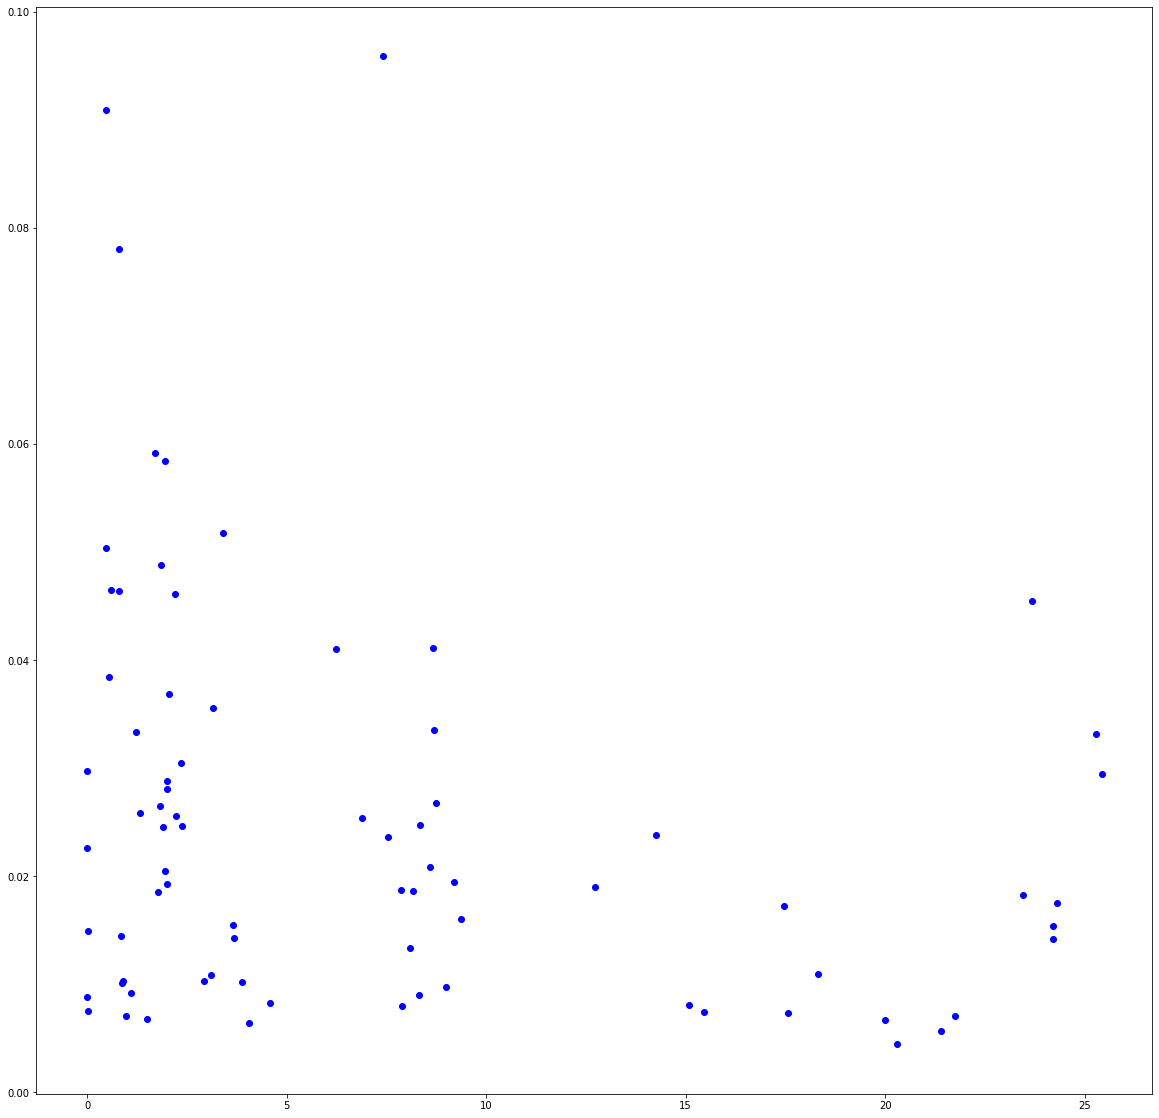

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(list(range(1, len(newxl) + 1)), newxl, color = 'b')
plt.scatter(list(range(1, len(newyl) + 1)), newyl, color = 'g')
plt.show()